In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
print("Hello this is working")

Hello this is working


Loading the dataset from Seaborn


In [23]:
sns.load_dataset('tips')

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [24]:
df = sns.load_dataset('tips')

In [25]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


Using OneHotEncoding to convert gender into numeric column


In [27]:
from sklearn.preprocessing import OneHotEncoder

In [28]:
encoder = OneHotEncoder()

In [29]:
encoded = encoder.fit_transform(df[['sex']]).toarray()

In [30]:
encoded

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.

In [31]:
columns_sex = encoder.get_feature_names_out(['sex'])

In [32]:
df_sex = pd.DataFrame(encoded,columns=columns_sex)

In [33]:
df = pd.concat((df,df_sex),axis=1)

In [34]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,sex_Female,sex_Male
0,16.99,1.01,Female,No,Sun,Dinner,2,1.0,0.0
1,10.34,1.66,Male,No,Sun,Dinner,3,0.0,1.0
2,21.01,3.50,Male,No,Sun,Dinner,3,0.0,1.0
3,23.68,3.31,Male,No,Sun,Dinner,2,0.0,1.0
4,24.59,3.61,Female,No,Sun,Dinner,4,1.0,0.0


In [38]:
df.drop(columns='sex',axis=1,inplace=True)

In [39]:
df.head()

,total_bill,tip,smoker,day,time,size,sex_Female,sex_Male
0,16.99,1.01,No,Sun,Dinner,2,1.0,0.0
1,10.34,1.66,No,Sun,Dinner,3,0.0,1.0
2,21.01,3.50,No,Sun,Dinner,3,0.0,1.0
3,23.68,3.31,No,Sun,Dinner,2,0.0,1.0
4,24.59,3.61,No,Sun,Dinner,4,1.0,0.0


In [41]:
df['time'].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

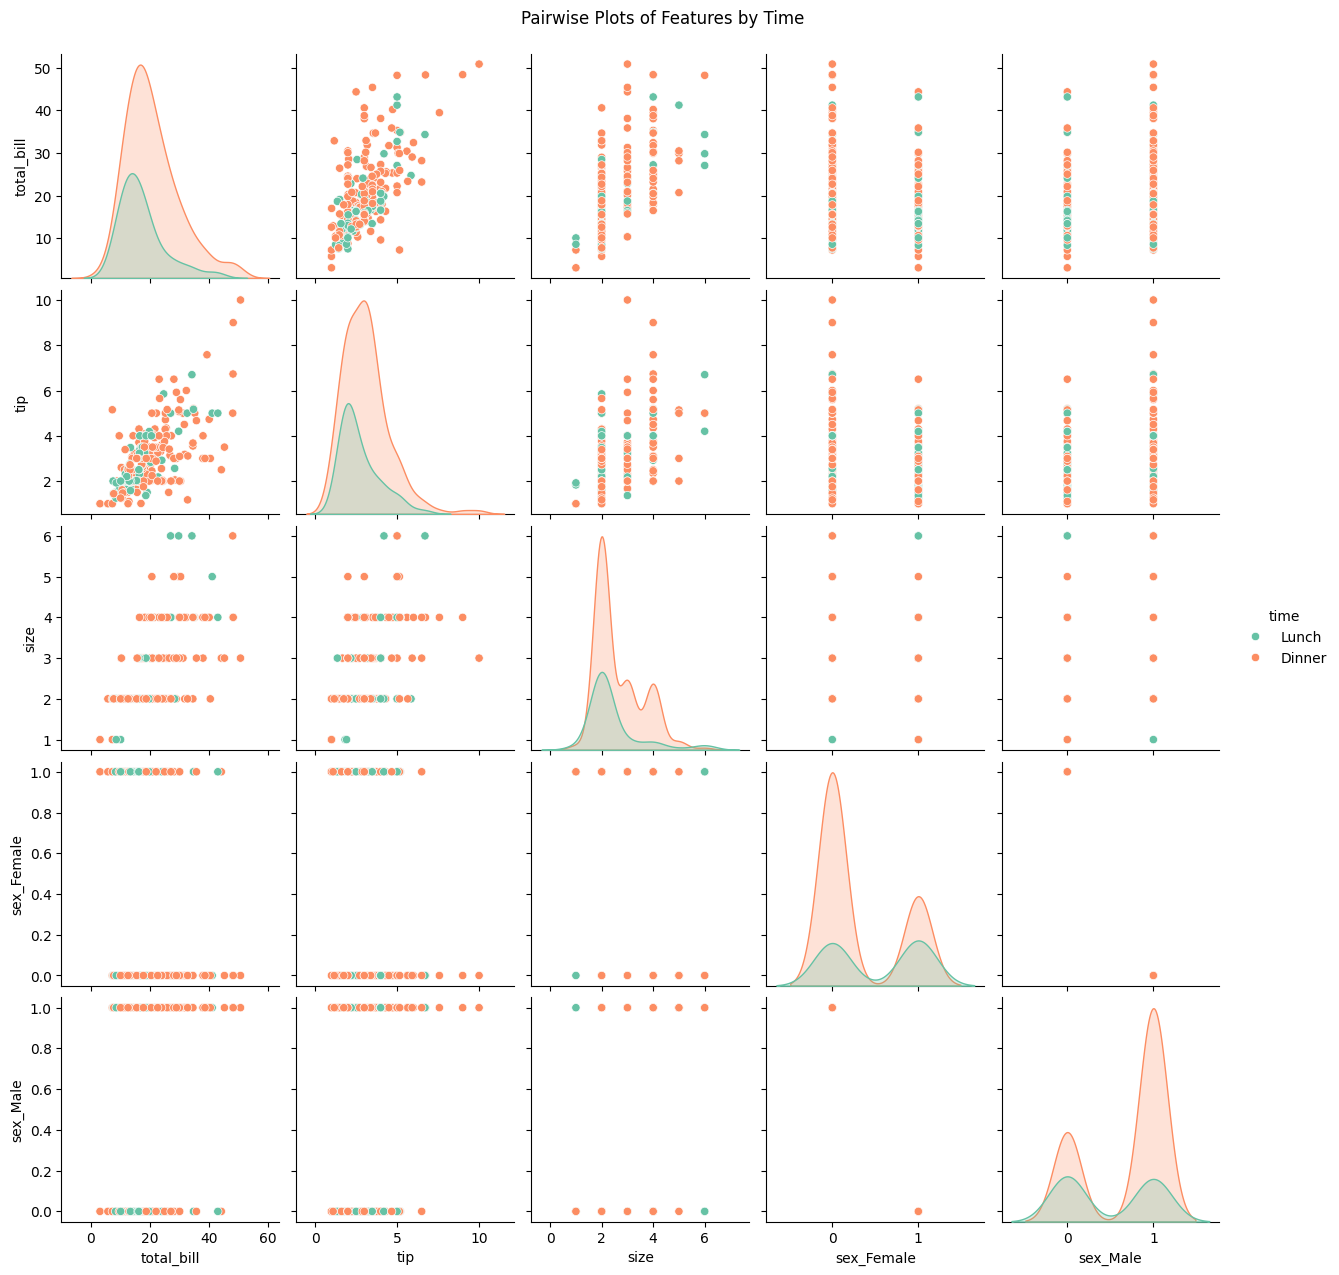

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns + 'time'
numeric_cols = ['total_bill', 'tip', 'size', 'sex_Female', 'sex_Male']
sns.pairplot(df[numeric_cols + ['time']], hue='time', palette='Set2')
plt.suptitle('Pairwise Plots of Features by Time', y=1.02)
plt.show()


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   smoker      244 non-null    category
 3   day         244 non-null    category
 4   time        244 non-null    category
 5   size        244 non-null    int64   
 6   sex_Female  244 non-null    float64 
 7   sex_Male    244 non-null    float64 
dtypes: category(3), float64(4), int64(1)
memory usage: 10.8 KB


In [45]:
df.head()

,total_bill,tip,smoker,day,time,size,sex_Female,sex_Male
0,16.99,1.01,No,Sun,Dinner,2,1.0,0.0
1,10.34,1.66,No,Sun,Dinner,3,0.0,1.0
2,21.01,3.50,No,Sun,Dinner,3,0.0,1.0
3,23.68,3.31,No,Sun,Dinner,2,0.0,1.0
4,24.59,3.61,No,Sun,Dinner,4,1.0,0.0


In [46]:
df['smoker'].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

Using OneHotEncoder for smoker column

In [47]:
smoker_encoded = encoder.fit_transform(df[['smoker']]).toarray()

In [49]:
smoker_col = encoder.get_feature_names_out(['smoker'])

In [50]:
smoker_col_df = pd.DataFrame(smoker_encoded,columns=smoker_col)

In [53]:
df = pd.concat((df,smoker_col_df),axis=1)
# df = pd.concat((df,df_sex),axis=1)

In [55]:
df.drop(columns='smoker',inplace=True)

In [56]:
df.head()

,total_bill,tip,day,time,size,sex_Female,sex_Male,smoker_No,smoker_Yes
0,16.99,1.01,Sun,Dinner,2,1.0,0.0,1.0,0.0
1,10.34,1.66,Sun,Dinner,3,0.0,1.0,1.0,0.0
2,21.01,3.50,Sun,Dinner,3,0.0,1.0,1.0,0.0
3,23.68,3.31,Sun,Dinner,2,0.0,1.0,1.0,0.0
4,24.59,3.61,Sun,Dinner,4,1.0,0.0,1.0,0.0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   day         244 non-null    category
 3   time        244 non-null    category
 4   size        244 non-null    int64   
 5   sex_Female  244 non-null    float64 
 6   sex_Male    244 non-null    float64 
 7   smoker_No   244 non-null    float64 
 8   smoker_Yes  244 non-null    float64 
dtypes: category(2), float64(6), int64(1)
memory usage: 14.3 KB


In [58]:
df.head()

,total_bill,tip,day,time,size,sex_Female,sex_Male,smoker_No,smoker_Yes
0,16.99,1.01,Sun,Dinner,2,1.0,0.0,1.0,0.0
1,10.34,1.66,Sun,Dinner,3,0.0,1.0,1.0,0.0
2,21.01,3.50,Sun,Dinner,3,0.0,1.0,1.0,0.0
3,23.68,3.31,Sun,Dinner,2,0.0,1.0,1.0,0.0
4,24.59,3.61,Sun,Dinner,4,1.0,0.0,1.0,0.0


In [59]:
df['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

Using OneHotEncoder for days in the data set

In [60]:
encoded_days = encoder.fit_transform(df[['day']]).toarray()

In [62]:
days_col = encoder.get_feature_names_out(['day'])

In [63]:
encoded_day_col = pd.DataFrame(encoded_days,columns=days_col)

In [64]:
df = pd.concat((df,encoded_day_col),axis=1)

In [65]:
df.drop(columns='day',inplace=True)

In [66]:
df.head()

,total_bill,tip,time,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur
0,16.99,1.01,Dinner,2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,10.34,1.66,Dinner,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,21.01,3.50,Dinner,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,23.68,3.31,Dinner,2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,24.59,3.61,Dinner,4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   time        244 non-null    category
 3   size        244 non-null    int64   
 4   sex_Female  244 non-null    float64 
 5   sex_Male    244 non-null    float64 
 6   smoker_No   244 non-null    float64 
 7   smoker_Yes  244 non-null    float64 
 8   day_Fri     244 non-null    float64 
 9   day_Sat     244 non-null    float64 
 10  day_Sun     244 non-null    float64 
 11  day_Thur    244 non-null    float64 
dtypes: category(1), float64(10), int64(1)
memory usage: 21.5 KB


Encoding time(Dependent variable) into numerical 

In [68]:
from sklearn.preprocessing import LabelEncoder

In [69]:
le = LabelEncoder()

In [70]:
y = le.fit_transform(df['time'])

In [71]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [72]:
X = df.drop(columns='time')

In [73]:
X

,total_bill,tip,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur
0,16.99,1.01,2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,10.34,1.66,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,21.01,3.50,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,23.68,3.31,2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,24.59,3.61,4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
240,27.18,2.00,2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
241,22.67,2.00,2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
242,17.82,1.75,2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [74]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   size        244 non-null    int64  
 3   sex_Female  244 non-null    float64
 4   sex_Male    244 non-null    float64
 5   smoker_No   244 non-null    float64
 6   smoker_Yes  244 non-null    float64
 7   day_Fri     244 non-null    float64
 8   day_Sat     244 non-null    float64
 9   day_Sun     244 non-null    float64
 10  day_Thur    244 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 21.1 KB


In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [79]:
from sklearn.naive_bayes import GaussianNB

In [80]:
gub = GaussianNB()

In [82]:
gub.fit(X_train,y_train)

GaussianNB()

In [85]:
y_pred = gub.predict(X_test)

In [86]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [88]:
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.9508196721311475
[[41  0]
 [ 3 17]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        41
           1       1.00      0.85      0.92        20

    accuracy                           0.95        61
   macro avg       0.97      0.93      0.94        61
weighted avg       0.95      0.95      0.95        61

